In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("nyc-rolling-sales-dirty.csv Assig 2 Datab Set")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


In [3]:
df[["TAX CLASS AT PRESENT"]]

,TAX CLASS AT PRESENT
0,2A
1,2
2,NaN
3,NaN
4,NaN
...,...
84543,1
84544,1
84545,1
84546,4


In [4]:
df.shape

(84548, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84518 non-null  object 
 3   BUILDING CLASS CATEGORY         84497 non-null  object 
 4   TAX CLASS AT PRESENT            84541 non-null  object 
 5   BLOCK                           84532 non-null  float64
 6   LOT                             84548 non-null  object 
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84503 non-null  object 
 10  APARTMENT NUMBER                84547 non-null  object 
 11  ZIP CODE                        84512 non-null  float64
 12  RESIDENTIAL UNITS               

In [6]:
df.isna().sum()

Unnamed: 0                         0
BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
EASE-MENT                          0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
APARTMENT NUMBER                   1
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

In [7]:
# Before elimninating null values, change the datatype.

In [8]:
df_int = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']

for col in df_int: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df_catagory = ['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in df_catagory:
    df[col] = df[col].astype("category") 

In [10]:
df["SALE DATE"]=pd.to_datetime(df["SALE DATE"], errors="coerce")

In [11]:
df.dtypes

Unnamed: 0                                 int64
BOROUGH                                 category
NEIGHBORHOOD                            category
BUILDING CLASS CATEGORY                 category
TAX CLASS AT PRESENT                    category
BLOCK                                    float64
LOT                                       object
EASE-MENT                                 object
BUILDING CLASS AT PRESENT               category
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE          category
SALE PRICE          

In [12]:
df[["TAX CLASS AT PRESENT"]]

,TAX CLASS AT PRESENT
0,2A
1,2
2,NaN
3,NaN
4,NaN
...,...
84543,1
84544,1
84545,1
84546,4


In [13]:
df.isna().sum()/len(df)*100

Unnamed: 0                         0.000000
BOROUGH                            0.000000
NEIGHBORHOOD                       0.035483
BUILDING CLASS CATEGORY            0.060321
TAX CLASS AT PRESENT               0.008279
BLOCK                              0.018924
LOT                                0.000000
EASE-MENT                          0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.053224
APARTMENT NUMBER                   0.001183
ZIP CODE                           0.042579
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.003548
dtype: float64

<AxesSubplot:>

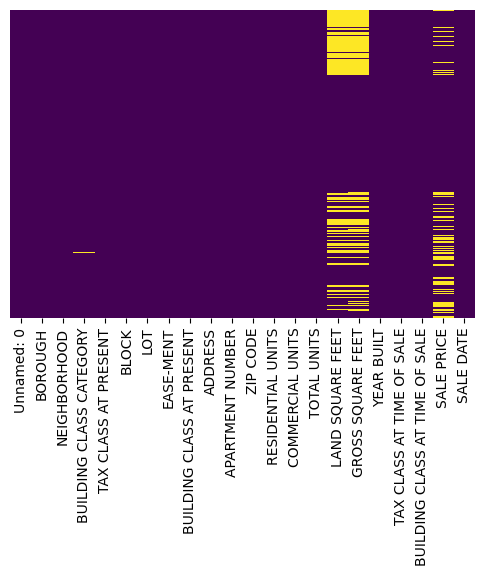

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.dropna(subset=["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BLOCK", "ADDRESS", "ZIP CODE", "APARTMENT NUMBER", "SALE DATE"], axis=0, inplace=True)

In [16]:
# Based on the missing values heatmap, we can see that some of the missing values in LAND SQUARE FEET exists 
# in GROSS SQUARE FEET and vice versa. Assuming these two column values are close to each other, 
# we can fill missing value from one another.

In [17]:
# let us check for outliers first
df[['LAND SQUARE FEET','GROSS SQUARE FEET']].describe()

,LAND SQUARE FEET,GROSS SQUARE FEET
count,5.816500e+04,5.680500e+04
mean,3.946011e+03,4.048722e+03
std,4.203104e+04,3.507214e+04
min,0.000000e+00,0.000000e+00
25%,1.650000e+03,1.050000e+03
50%,2.325000e+03,1.680000e+03
75%,3.501000e+03,2.560000e+03
max,4.252327e+06,3.750565e+06


In [18]:
# There are outliers in the lower and upper bound of the columns. We will set an upper bound of 75% for our dataset as maximum since 75th percentile of the dataset represents a good cutoff for majority of houses' square feet metrics.

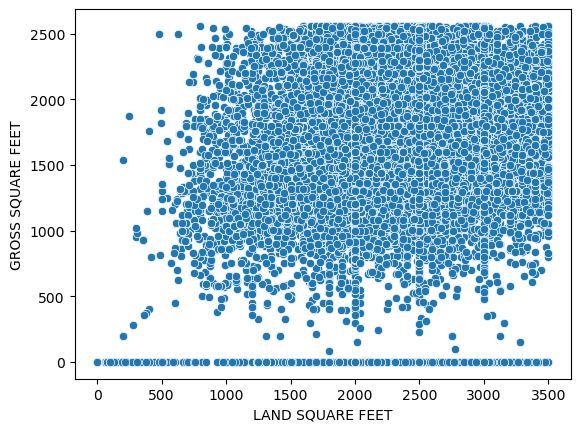

In [19]:
data=df[(df['LAND SQUARE FEET']<=3500)& (df['GROSS SQUARE FEET']<=2560)]
sns.scatterplot(x='LAND SQUARE FEET', y='GROSS SQUARE FEET', data=data)
plt.show()

In [20]:
# It is hard to notice any correlation from the scatter plot. Below is the correlation matrix

In [21]:
df[(df['LAND SQUARE FEET']<=3500)& (df['GROSS SQUARE FEET']<=2560)][['LAND SQUARE FEET','GROSS SQUARE FEET']].corr()

,LAND SQUARE FEET,GROSS SQUARE FEET
LAND SQUARE FEET,1.000000,0.796581
GROSS SQUARE FEET,0.796581,1.000000


In [22]:
# As we can see from the correlation matrix above, these two columns are positive correlated with each other. 
# We can now fill in the missing value from one column to another, which will help us to reduce missing values

In [23]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 22)
(1366, 22)


In [24]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [25]:
df.describe()

,Unnamed: 0,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,84386.000000,84386.000000,84386.000000,84386.000000,84386.000000,84386.000000,5.817100e+04,5.817100e+04,84386.000000,6.987000e+04
mean,10352.347309,4239.572429,10731.750610,2.023558,0.193670,2.247470,3.949340e+03,4.368949e+03,1789.272450,1.276946e+06
std,7149.918003,3568.591480,1291.921567,16.734959,8.721515,18.988768,4.203022e+04,4.225445e+04,537.427542,1.141449e+07
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4241.000000,1324.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.061000e+03,1920.000000,2.250000e+05
50%,8956.500000,3311.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.710000e+03,1940.000000,5.300000e+05
75%,15992.750000,6290.000000,11357.000000,2.000000,0.000000,2.000000,3.502500e+03,2.600000e+03,1965.000000,9.500000e+05
max,26739.000000,16322.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


In [26]:
# Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

#ZipCode column has "0" min value.
#Most of the properties have 2 unit and maximum of 1844 units? This should be treated as an outlier.
#Other columns also have outliers which needs further investigation.
#Year column has also "0" min value that dosn,t make sense.
#Most sales prices less than 10000 can be treated as gift or transfer fees.

In [27]:
#'1':'Manhattan', '2':'Bronx', '3': 'Brooklyn', '4':'Queens','5':'Staten Island'
df['BOROUGH'] = df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})

In [28]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18,22,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD STREET, 17",...,0,0,0,NaN,NaN,1920,2,C6,450000.0,2016-09-01
19,23,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373.0,49,,C6,"311 EAST 3RD, 22",...,0,0,0,NaN,NaN,1920,2,C6,510000.0,2017-08-17
20,24,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,374.0,8,,C6,"702 EAST 5TH STREET, 5E",...,0,0,0,NaN,NaN,1900,2,C6,NaN,2016-09-07
21,25,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,375.0,30,,C6,"742 EAST 6TH STREET, 1",...,0,0,0,NaN,NaN,1902,2,C6,350000.0,2017-08-30
22,26,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376.0,14,,C6,244 EAST 7TH STREET,...,24,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017-06-21


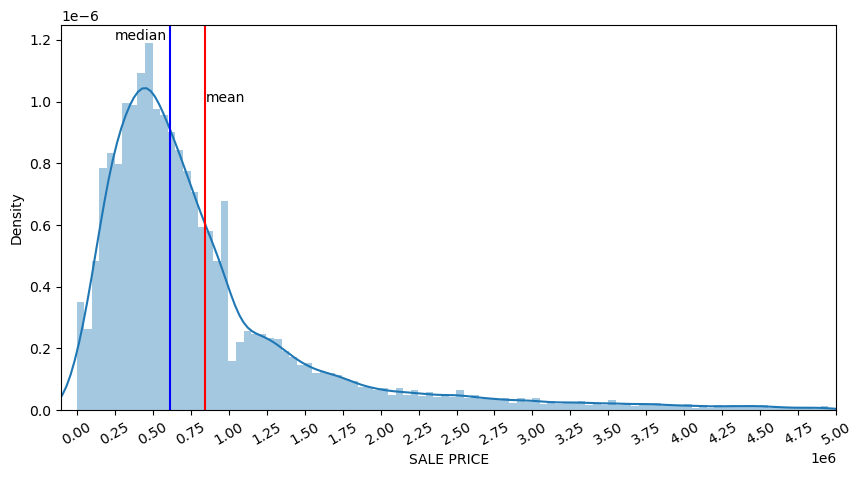

In [29]:
import matplotlib.ticker as ticker


plt.figure(figsize=(10,5))
plotd = sns.distplot(df[(df['SALE PRICE']>100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(df[(df['SALE PRICE']>100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(df[(df['SALE PRICE']>100) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.show()

In [30]:
# As we can observe from the distribution plot, prices are skewed to the right. 
# Most of the prices are around 315 and 700 thousands range. The mean is around 750,000

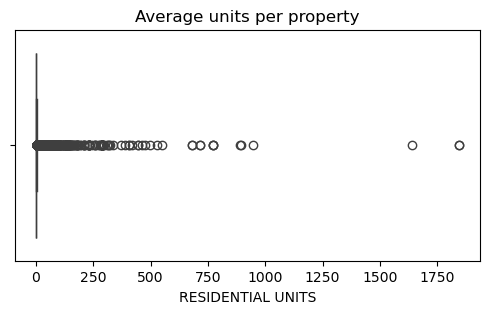

In [31]:
# The dataset seem to have lots of outliers, mainly due to commercial property sales
figure = plt.figure(figsize=(6, 3))
sns.boxplot(x='RESIDENTIAL UNITS',data=df)
plt.title('Average units per property')
plt.show()
#print('not included:', hsales[hsales['RESIDENTIAL UNITS']>10].shape[0], 'properties')

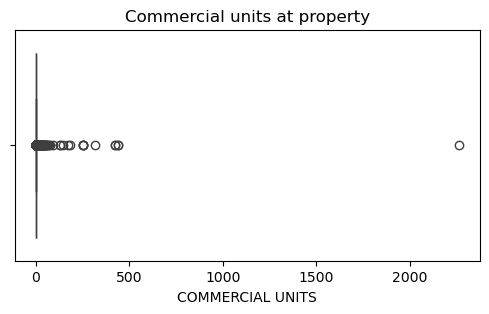

In [32]:
figure = plt.figure(figsize=(6, 3))
sns.boxplot(x='COMMERCIAL UNITS',data=df)
plt.title('Commercial units at property')
plt.show()
#print('not included:', hsales[hsales['COMMERCIAL UNITS']>20].shape[0], 'properties')

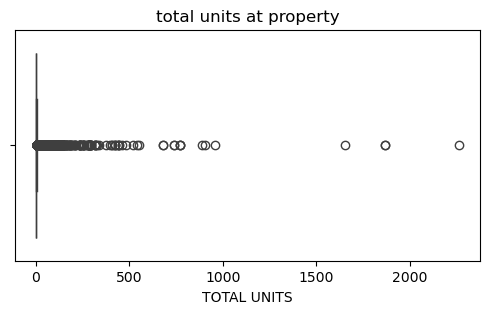

In [33]:
figure = plt.figure(figsize=(6, 3))
sns.boxplot(x='TOTAL UNITS',data=df)
plt.title('total units at property')
plt.show()
#print('not included:', hsales[hsales['TOTAL UNITS']>10].shape[0], 'properties')

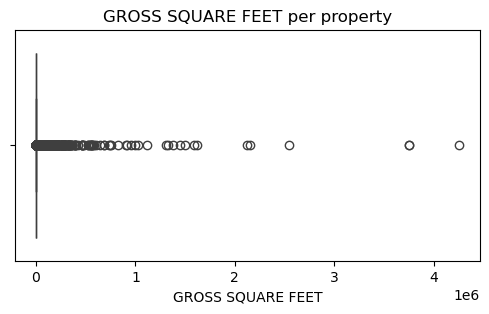

In [34]:
figure = plt.figure(figsize=(6, 3))
sns.boxplot(x='GROSS SQUARE FEET',data=df)
plt.title('GROSS SQUARE FEET per property')
plt.show()
#print('not included:', hsales[hsales['GROSS SQUARE FEET']>20000].shape[0], 'properties')

In [35]:
print("Uneqaul values for total units:", (df["TOTAL UNITS"] != df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']).sum())

Uneqaul values for total units: 2635


In [36]:
df[df["TOTAL UNITS"] != df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]['TOTAL UNITS'].value_counts()

1      2614
2        12
3         4
14        1
24        1
4         1
9         1
117       1
Name: TOTAL UNITS, dtype: int64

In [37]:
# These uneqaul values for total unit counts are mostly equal to 1 which might mean they are not residential or commercial units.

In [38]:
df[(df["TOTAL UNITS"] != df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']) & (df["TOTAL UNITS"]==1)]['BUILDING CLASS CATEGORY'].value_counts()[:5]

44 CONDO PARKING                               1324
43 CONDO OFFICE BUILDINGS                       465
47 CONDO NON-BUSINESS STORAGE                   351
45 CONDO HOTELS                                 211
46 CONDO STORE BUILDINGS                        151
Name: BUILDING CLASS CATEGORY, dtype: int64

In [39]:
# As we can observe those properties with 1 total units but with no residential or commercial units are parking, office or storages.

In [40]:
# For visualization purposes, we will treat outliers seperately.

In [41]:
dataset = df[(df['COMMERCIAL UNITS']<20) & (df['TOTAL UNITS']<50) & (df['SALE PRICE']<5000000) & (df['SALE PRICE']>100000) & (df['GROSS SQUARE FEET']>0)]

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

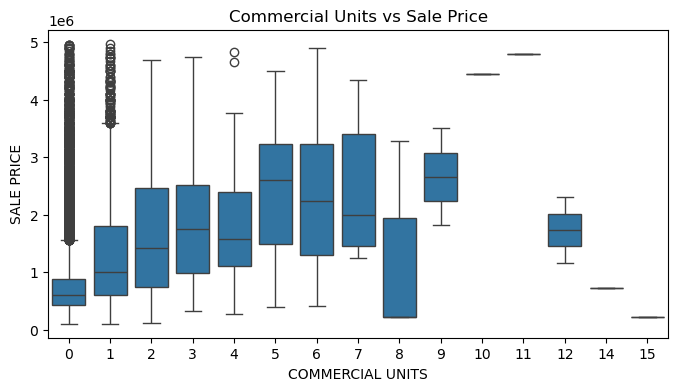

In [42]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='COMMERCIAL UNITS', y="SALE PRICE", data=dataset)
plt.title('Commercial Units vs Sale Price')

In [43]:
dataset[dataset['YEAR BUILT']<1800]['YEAR BUILT'].value_counts()

0    267
Name: YEAR BUILT, dtype: int64

In [44]:
dataset[dataset['YEAR BUILT']>1800]['BUILDING CLASS CATEGORY'].value_counts()[:15]

01 ONE FAMILY DWELLINGS                        12427
02 TWO FAMILY DWELLINGS                         9577
03 THREE FAMILY DWELLINGS                       2212
07 RENTALS - WALKUP APARTMENTS                  1345
22 STORE BUILDINGS                               352
14 RENTALS - 4-10 UNIT                           284
29 COMMERCIAL GARAGES                            142
21 OFFICE BUILDINGS                              125
30 WAREHOUSES                                    122
27 FACTORIES                                      67
37 RELIGIOUS FACILITIES                           49
05 TAX CLASS 1 VACANT LAND                        26
06 TAX CLASS 1 - OTHER                            19
08 RENTALS - ELEVATOR APARTMENTS                  19
32 HOSPITAL AND HEALTH FACILITIES                 13
Name: BUILDING CLASS CATEGORY, dtype: int64

In [45]:
# Above table brings some new insight into why some properties do not have a year or number of units in them. 
# These are vacant lands, elevators, parking and garages. 

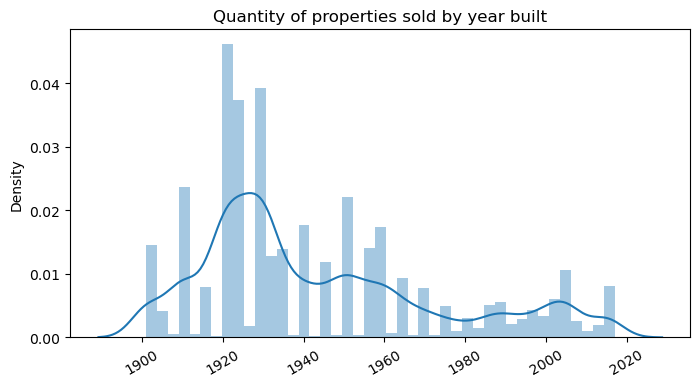

In [46]:
plt.figure(figsize=(8, 4))

sns.distplot(x=dataset[dataset['YEAR BUILT']>1900]['YEAR BUILT'])
plt.xticks(rotation=30) 
plt.title("Quantity of properties sold by year built")
plt.show()

In [47]:
# Most of the properties were built around 1920s

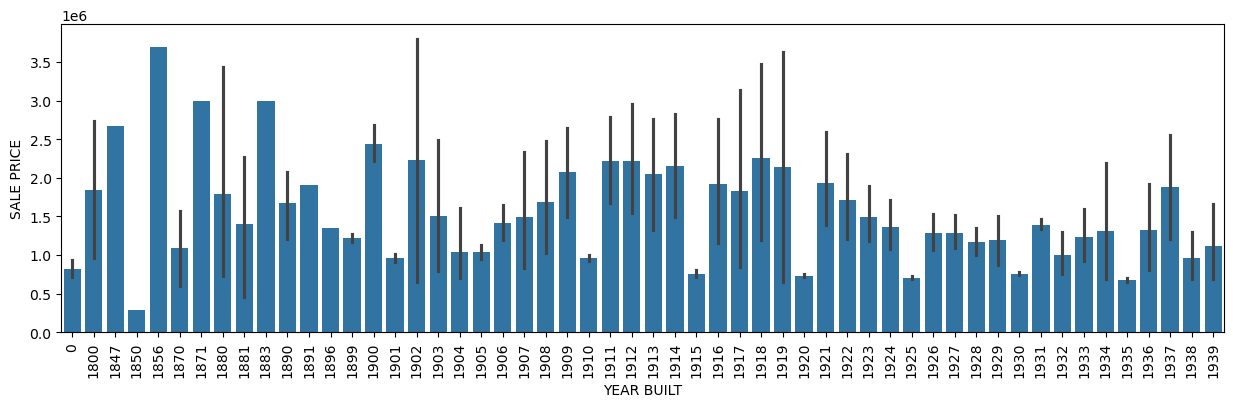

In [48]:
plt.figure(figsize=(15, 4))
sns.barplot(x='YEAR BUILT', y='SALE PRICE', data=dataset[dataset['YEAR BUILT']<1940])
plt.xticks(rotation=90)
plt.show()

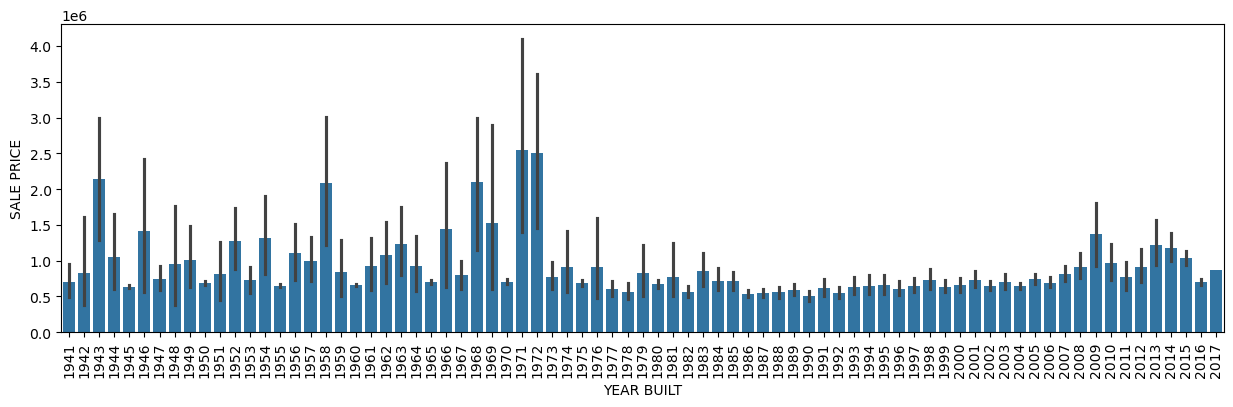

In [49]:
plt.figure(figsize=(15, 4))
sns.barplot(x='YEAR BUILT', y='SALE PRICE', data=dataset[dataset['YEAR BUILT']>1940])
plt.xticks(rotation=90)
plt.show()

In [50]:
# Above bar plots show that properties built before 1940 have higher price than properties built after 1940.

<Figure size 800x400 with 0 Axes>

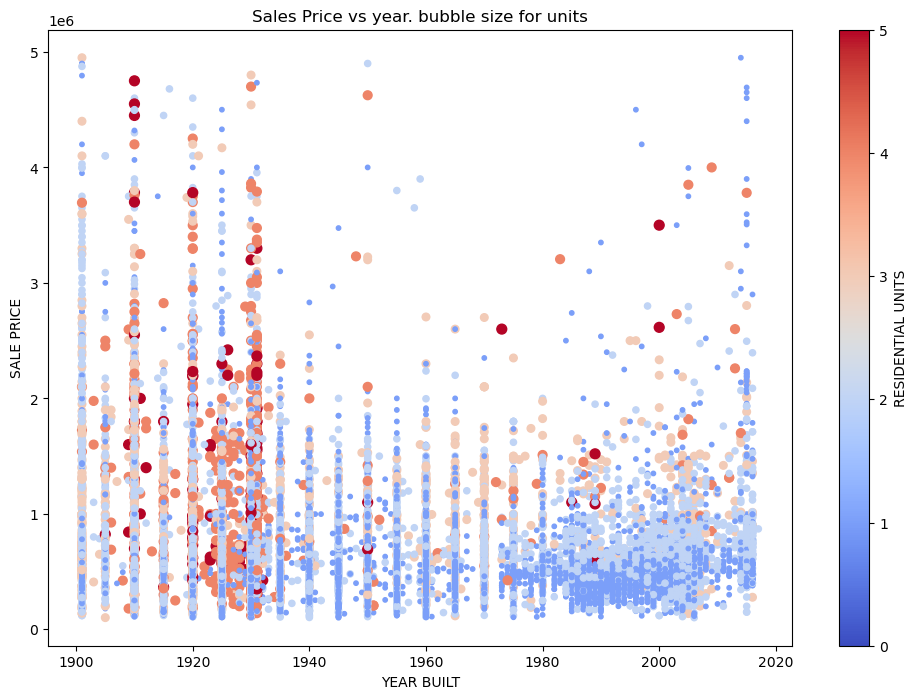

In [51]:
plt.figure(figsize=(8,4))
dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5].plot.scatter(x='YEAR BUILT', y='SALE PRICE', c='RESIDENTIAL UNITS', cmap='coolwarm',figsize=(12,8),s=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5]['RESIDENTIAL UNITS']*10)
plt.title('Sales Price vs year. bubble size for units')
plt.show()

In [52]:
# New properties built after 2000 are sold for relatively cheaper prices compared to houses built in early 1900s

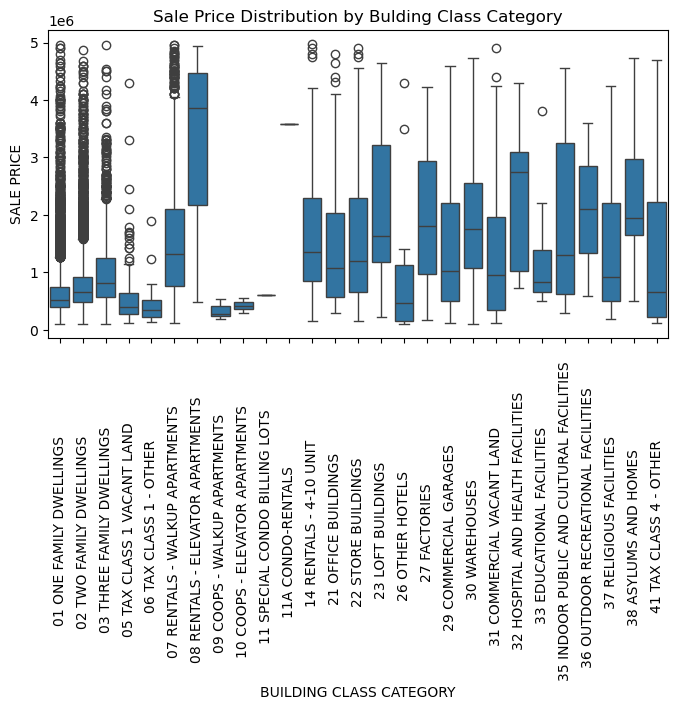

In [53]:
plt.figure(figsize=(8, 4))
order = sorted(dataset['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=dataset, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

In [54]:
dataset.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
172,176,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391.0,19,,S3,624 EAST 9TH STREET,...,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15
174,178,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394.0,5,,S5,183 AVENUE B,...,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03
195,199,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390.0,34,,K4,115 AVENUE C,...,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28
222,226,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765.0,25,,C4,219 WEST 15TH STREET,...,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31
223,227,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,765.0,25,,C4,219 WEST 15TH STREET,...,9,0,9,1566.0,6330.0,1901,2,C4,416790.0,2017-08-31


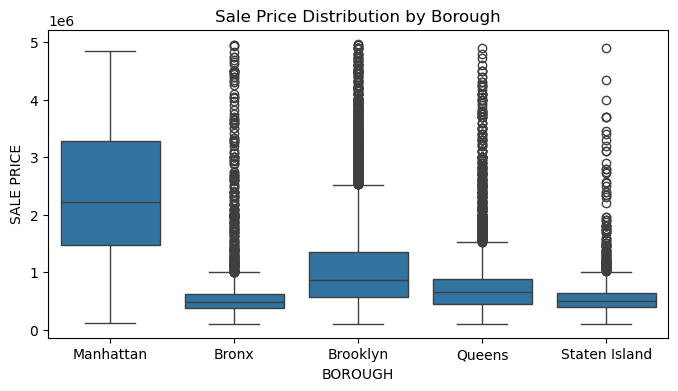

In [55]:
plt.figure(figsize=(8,4))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=dataset)
plt.title('Sale Price Distribution by Borough')
plt.show()

In [56]:
# Most expensive properties are located in Manhattan with median sale price of over 2 million USD for a property. Relatively cheaper properties are in Bronx with median property prices of 500,000 USD